# AI-Powered Hotel Booking Cancellation Prediction App

**Gisma University of Applied Sciences**     
**M516 Business Project in Big Data & AI (WS0925)**     
**Student Name:** Sirish Konda     
**Student ID:** GH1036886

**Github Link:** 

**Application Live Demo:** 

# Abstract

This pipeline is dedicated to hotel booking cancellations predictive analysis via machine learning classification model which will eventually be the basis for developing a web application. The pipeline consists of a complete data science process which carries out operations of data cleaning, exploratory data analysis (EDA), feature extraction, model training, evaluation and extraction.

The pipelines EDA suggests that lead time, deposit type, market segment and customer type are the most important variables that have an impact on cancellation behaviour. After examining class imbalance, several machine learning algorithms including Logistic Regression, Decision tree and Random Forest are trained and tested with different metrics, but Random Forest is chosen as it has the highest F1-score.

In this pipeline, the F1-score is highlighted as the core of the performance evaluation, as it properly balances precision (reducing false alarms so that unnecessary overbooking isn't caused) and recall (ensuring true cancellations are correctly identified). This balance is particularly important for the hospitality industry, where both false positives and false negatives can cause revenue and operational inefficiencies. Out of the various models, the Random Forest classifier demonstrated the highest F1-score, thus showcasing not only its strong predictive performance but also its reliability.

To facilitate the model's use in practice, it was incorporated into a web application based on Streamlit, which enables the users to enter the booking details and instantly receive a prediction of the likelihood of cancellation. The deployment thus crosses the border between data science and real-world decision-making, hence empowering hotel managers to take actions as such adjusting pricing, make proper overbooking strategies based on data driven insights.

# Introduction

The hospitality industry faces significant challenges from booking cancellations which negatively affect revenue forecasting, inventory management and operational efficiency. When customers cancel their reservations very close to the time of their arrival, hotels have to deal with unoccupied rooms, disrupted staffing, and loss of potential revenue. This problem has become even worse with the proliferation of online travel agencies (OTAs) and the setting of more flexible cancellation terms, thus making it very critical for hotels to predict cancellations beforehand.

The current management approaches for decision-making depend on either historical patterns or manual evaluation but these methods fail to handle the intricate relationships between booking elements and consumer actions and outside influences. The machine learning approach enables hotels to analyze extensive booking information rapidly which enables them to estimate cancellation risks at the time of booking. Hotels that succeed in cancellation prediction will achieve market leadership through their optimal overbooking strategies and deposit policies and marketing approaches which result in financial stability.

The pipeline evaluates the model performance through F1-score assessment. The study uses F1-score instead of accuracy because accuracy fails to show the actual performance of classifiers when the classes have uneven distribution. The F1-score functions as a balanced performance indicator because it evaluates both precision and recall metrics. The hospitality industry faces two major problems when hotel staff incorrectly identify canceled bookings as they must handle overbooking situations and they lose revenue from undetected actual cancellations. The F1-score achieves a perfect balance between precision and recall to ensure the model performs well in actual business operations.

The pipeline unites data exploration techniques with feature engineering methods and predictive modeling approaches to discover important customer booking patterns and develop an accurate cancellation prediction system. Hotel managers will use the acquired knowledge to create data-driven choices which boost their business success and operational performance.

# Dataset Overview

Link to Dataset: https://www.kaggle.com/datasets/arezaei81/hotel-bookingcvs   

The dataset used is the "**hotel_booking**" dataset from Kaggle. The dataset consists 119,390 rows approximately, with 36 columns. These columns are explained below.

**Columns:**

1. **hotel:** Type of hotel (Resort Hotel, City Hotel)

2. **is_canceled:** Reservation cancellation status (0 = not canceled, 1 = canceled)

3. **lead_time:** Number of days between booking and arrival

4. **arrival_date_year:** Year of arrival

5. **arrival_date_month:** Month of arrival

6. **arrival_date_week_number:** Week number of the year for arrival

7. **arrival_date_day_of_month:** Day of the month of arrival

8. **stays_in_weekend_nights:** Number of weekend nights (Saturday and Sunday) the guest stayed or booked

9. **stays_in_week_nights:** Number of week nights the guest stayed or booked

10. **adults:** Number of adults

11. **children:** Number of children

12. **babies:** Number of babies

13. **meal:** Type of meal booked (BB(Bed & Breakfast), FB(Full Board), HB(Half Board), SC(Self Catering), Undefined)

14. **country:** Country of origin of the guest

15. **market_segment:** Market segment designation

16. **distribution_channel:** Booking distribution channel(Direct, Corporate, Online TA, Offline TA/TO, Groups, Complementary, Aviation)

17. **is_repeated_guest:** If the guest is a repeat customer (0 = not repeated, 1 = repeated)

18. **previous_cancellations:** Number of previous bookings that were canceled by the customer

19. **previous_bookings_not_canceled:** Number of previous bookings that were not canceled by the customer

20. **reserved_room_type:** Type of reserved room

21. **assigned_room_type:** Type of assigned room

22. **booking_changes:** Number of changes made to the booking

23. **deposit_type:** Type of deposit made (No Deposit, Refundable, Non Refund)

24. **agent:** ID of the travel agent responsible for the booking

25. **company:** ID of the company responsible for the booking

26. **days_in_waiting_list:** Number of days the booking was in the waiting list

27. **customer_type:** Type of customer (Transient, Contract, Transient-Party, Group)

28. **adr:** Average Daily Rate

29. **required_car_parking_spaces:** Number of car parking spaces required

30. **total_of_special_requests:** Number of special requests made

31. **reservation_status:** Last reservation status (Check-Out, Canceled, No-Show)

32. **reservation_status_date:** Date of the last reservation status

33. **name:** Guest's name

34. **email:** Guest's email address

35. **phone-number:** Guest's phone number

36. **credit_card:** Last four digits of the guest's credit card


# Explanation of the features



# Methodology
1. **Data Collection & Cleaning:**  
   The dataset was preprocessed to check and handle missing values, remove duplicates, and check the data types.

2. **Exploratory Data Analysis (EDA):**  
   Visualizations and summary statistics were used to understand variable distributions, data and cancellation patterns.

3. **Feature Engineering:**  
   New features were introduced to improve model accuracy.

4. **Model Development:**  
   Random Forest classification is trained with its best performer to predict cancellations.

5. **Model Evaluation:**  
   Performance was assessed using metrics like ROC-AUC, confusion matrix, and classification report.

6. **Model Extraction:**   
   The best performer model was extracted to be used in the web application.

Each step of the methodolgy is explained along with the code below:

# Importing required packages

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix

import os
import joblib
from pathlib import Path

# Data accusation

## Reading the dataset

In [56]:
booking_data = pd.read_csv('../data/hotel_booking.csv')

In [57]:
booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Dataset Overview

In [58]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Based on description of dataset changing the datatypes to match the dataset.

In [59]:
categorical_columns_semantics = [
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'is_repeated_guest',
    'agent',
    'company',
]

for column in categorical_columns_semantics:
    if column in booking_data.columns:
        booking_data[column] = booking_data[column].astype(str)

booking_data['reservation_status_date'] = pd.to_datetime(booking_data['reservation_status_date'])

booking_data.dtypes

hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                         object
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [60]:
booking_data = booking_data.replace('nan', np.nan)

### Checking for duplicate values

In [61]:
booking_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

### Checking for null values

In [62]:
booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Statistic summary for numerical data

In [63]:
booking_data.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


**The following key findings emerge from the above statistic summary about numerical and noisy features.**

1. The lead time data shows an average duration of 104 days which indicates that most customers book their stays in advance.

2. The guest stay duration averages between 2 and 3 nights while the majority of guests consist of two adults and there are only occasional children and babies.

3. The Average Daily Rate (ADR) reaches 102 but the data contains negative values which indicate possible entry errors or special cases that need resolution.

4. The features adults and children and babies show abnormal values which include zero adults and ten children thus indicating potential noisy data points. The pipeline will perform data cleaning or validation operations on these points.

## Statistic summary of categorical data

In [64]:
booking_data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


**Key Insights on Categorical Features from above statistical summary:**

1. Most guests are not repeated customers and guests have strong reliance on third party channels to make booking(Online Travel Agencies(OTA/TA))

2. The majority of bookings have “No Deposit”, which may contribute to higher cancellation rates.

3. Company and Agent fields have a large number of missing or unique values, which will be validated later on in the pipeline.

# Data Preprocessing

### Checking if features are directly or indirectly related to target variable(is_cancelled) and removing them accordingly

In [65]:
booking_data['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

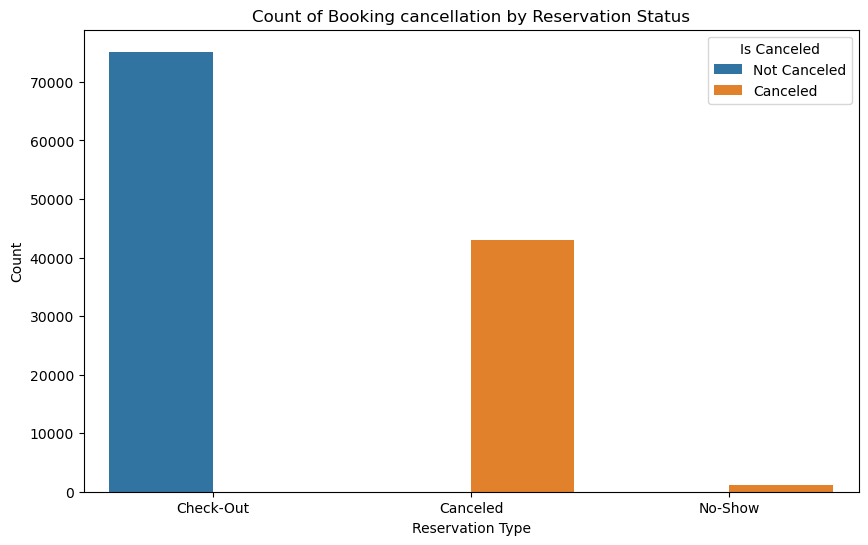

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_status', hue='is_canceled', data=booking_data)
plt.title('Count of Booking cancellation by Reservation Status')
plt.xlabel('Reservation Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

From the above code it is clear that,the feature 'reservation_status' is directly correlated with the target variable 'is_canceled'.

Bookings labeled “Canceled” or “No-Show” always have is_canceled = 1, while

*   Booking labeled "Canceled" or "No-show" always have is_canceled = 1.
*   Booking labeled "Check-out" always have is_canceled = 0

Because it reveals the target value, using this feature in the model will cause data leakage. Therefore, reservation_status is removed before training the predictive model.

### Dropping 'reservation_status"

In [67]:
booking_data = booking_data.drop(['reservation_status'], axis=1)

Combining `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month` to get the exact arival date in datetime format.

In [68]:
booking_data['arrival_date'] = pd.to_datetime(
    booking_data['arrival_date_year'].astype(str) + '-' +
    booking_data['arrival_date_month'].astype(str) + '-' +
    booking_data['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d', errors='coerce'
)

The `reservation_status_date` column records the last date on which a booking’s status (e.g., Canceled, Check-Out, No-Show) was updated. By calculating the difference between this date and the arrival date, we can observe booking behavior patterns.

In [69]:
booking_data[['is_canceled', 'reservation_status_date', 'arrival_date']].head(10)

,is_canceled,reservation_status_date,arrival_date
0,0,2015-07-01,2015-07-01
1,0,2015-07-01,2015-07-01
2,0,2015-07-02,2015-07-01
3,0,2015-07-02,2015-07-01
4,0,2015-07-03,2015-07-01
5,0,2015-07-03,2015-07-01
6,0,2015-07-03,2015-07-01
7,0,2015-07-03,2015-07-01
8,1,2015-05-06,2015-07-01
9,1,2015-04-22,2015-07-01


The above data shows a clear relationship between the `reservation_status_date` and the `is_canceled` feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

In [70]:
booking_data['status_after_arrival'] = booking_data['reservation_status_date'] > booking_data['arrival_date']

In [71]:
summary = booking_data.pivot_table(
    values='status_after_arrival',
    index='is_canceled',
    aggfunc=['mean', 'count']
).round(3)

print(summary)

                            mean                count
            status_after_arrival status_after_arrival
is_canceled                                          
0                          0.991                75166
1                          0.000                44224


The `status_after_arrival` feature represents the number of days between the arrival date and the date at which the reservation status was last updated.


*    Since `is_canceled` is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.
*  Since `is_canceled` is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.

Therefore we drop the features `reservation_status_date` and `reservation_status_days_difference`.

In [72]:
booking_data = booking_data.drop(['reservation_status_date', 'status_after_arrival', 'arrival_date'], axis=1)

## Dropping irrelevant features with proper reasoning

In [73]:
booking_data['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

The `arrival_date_year` feature only has 3 years and we are building a model to predict future instances. Therefore, it is reasonable to consider `arrival_date_year` as an irrelevant feature and to drop it.

In [74]:
booking_data = booking_data.drop(['arrival_date_year'], axis=1)

In [75]:
booking_data['assigned_room_type'].value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

`assigned_room_type` refers to when the room is assigned to the guest after they arrive at the hotel, so it cannot be used to predict cancellation. Therefore this feature is dropped.

In [76]:
booking_data = booking_data.drop(['assigned_room_type'], axis=1)

# Feature engineering

### Changing the countries to continent and then filling the null values with a diffrent category(other)

In [77]:
def country_to_continent(country_code):
    try:
        # Convert ISO alpha-3 (e.g. 'USA') to alpha-2 (e.g. 'US')
        if len(country_code) == 3:
            country_code = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continents = {
            'AF': 'Africa',
            'NA': 'North America',
            'OC': 'Oceania',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'SA': 'South America'
        }
        return continents[continent_code]
    except:
        return np.nan

In [78]:
booking_data['region'] = booking_data['country'].apply(country_to_continent)

In [79]:
booking_data['region'] = booking_data['region'].fillna('Other')

In [80]:
booking_data['region'].value_counts()

region
Europe           107826
Asia               4468
South America      2708
North America      2274
Africa             1113
Oceania             506
Other               495
Name: count, dtype: int64

Dropping the column country as we have created a new feature region for better prediction.

In [81]:
booking_data = booking_data.drop('country', axis=1)

### Handling Missing Values of High-Cardinality Features

In [82]:
booking_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [83]:
name_email_check = (
    booking_data.groupby('name')['email']
    .nunique()
    .reset_index()
    .rename(columns={'email': 'unique_email_count'})
)

In [84]:
same_name_diff_email = name_email_check[name_email_check['unique_email_count'] > 1]

In [85]:
booking_data.groupby('name')['email'].unique().loc[same_name_diff_email['name']]

name
Aaron Adams         [AAdams94@comcast.net, Aaron.Adams@zoho.com, A...
Aaron Allen                  [AAllen@mail.com, Aaron_A86@outlook.com]
Aaron Anderson      [Aaron_Anderson@gmail.com, Aaron.Anderson@yand...
Aaron Bailey         [Aaron.Bailey@comcast.net, Aaron.Bailey@aol.com]
Aaron Bowen                   [Aaron_B50@yahoo.com, Aaron_B@zoho.com]
                                          ...                        
Zachary Williams    [Zachary_Williams37@verizon.com, Zachary_Willi...
Zachary Wilson      [ZWilson@hotmail.com, ZacharyWilson25@protonma...
Zachary Wood        [ZacharyWood93@protonmail.com, Wood_Zachary69@...
Zachary Young          [Zachary_Y@att.com, Zachary_Young@outlook.com]
Zoe Wu                       [Zoe_Wu95@hotmail.com, Zoe.W89@mail.com]
Name: email, Length: 18596, dtype: object

The `name` column is used to engineer a new feature — **`number_of_bookings`** this represents how many times a guest has booked in the dataset. This helps identify repeat customers who may show different cancellation behavior.

In [86]:
booking_data['number_of_bookings'] = booking_data.groupby('name')['name'].transform('count')

In [87]:
booking_data[['number_of_bookings']].head()

,number_of_bookings
0,1
1,2
2,3
3,1
4,1


In [88]:
booking_data = booking_data.drop(['agent', 'company', 'email', 'credit_card', 'phone-number', 'name'], axis=1)

Checking the `children` column, which contains a few missing values, and then replacing them with 0, we assume that no entry means no children were present in the booking.


In [89]:
booking_data['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [90]:
booking_data['children'] = booking_data['children'].fillna(0)
booking_data['children'].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

Identifing and correcting noisy data entries which we found in while checking statistical summary, these include negative `adr` (Average Daily Rate) values, bookings with 0 adults, and unrealistic values like 10 children or 10 babies in a single reservation. These entries are most likely data entry errors or outliers.

In [91]:
noisy_data = {
    'adr':      booking_data[booking_data['adr'] < 0],
    'adults':   booking_data[booking_data['adults'] == 0],
    'children': booking_data[booking_data['children'] == 10],
    'babies':   booking_data[booking_data['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

1. Negative `adr` values is replaced with the median rate.
2. Rows with invalid adult or child counts are removed.   

Cleaning these anomalies is important because inaccurate or inconsistent data can mislead the model which will lead to unreliable predictions.

In [92]:
# Replace negative adr with median of adr column
booking_data.loc[booking_data['adr'] < 0, 'adr'] = booking_data['adr'].median()

# Remove rows with 0 adults
booking_data = booking_data[booking_data['adults'] != 0]

# Remove rows with 10 children or 10 babies
booking_data = booking_data[booking_data['children'] != 10]
booking_data = booking_data[booking_data['babies'] != 10]
booking_data.reset_index(drop=True, inplace=True)

### Checking if the noisy data has been handledd.

In [93]:
noisy_data_handled = {
    'adr': booking_data[booking_data['adr'] < 0],
    'adults': booking_data[booking_data['adults'] == 0],
    'children': booking_data[booking_data['children'] == 10],
    'babies': booking_data[booking_data['babies'] == 10],
}
noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

In [94]:
booking_data.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

Now, the pipeline prepares the dataset for model training, to do that we first ensure all the features are in numerical format to make it suitable for ML algorithm. So, first the colum `arrival_date_month`(which contains the names of the month) are converted into numerical values from 1-12 each number representing a month. Then `hotel`, `meal`, `market_segment`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `deposit_type`, `customer_type` and `region` which are categorical variables are converted into dummy variables using using one-hot encoding. This ensures that the model understands and processes the data effectively.

In [95]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
booking_data['arrival_date_month'] = booking_data['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'deposit_type', 'customer_type', 'region']
booking_data = pd.get_dummies(booking_data, columns=one_hot_cols, drop_first=True)

booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  object 
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  previous_cancellations          118985 non-null  int64  
 11  previous_bookings_not_canceled  118985 non-null  int64  
 12  booking_changes 

In [96]:
booking_data['is_canceled'] = booking_data['is_canceled'].astype(int)

In this step, we calculate and visualize the percentage distribution of canceled and non-canceled bookings to understand the target variable’s balance.

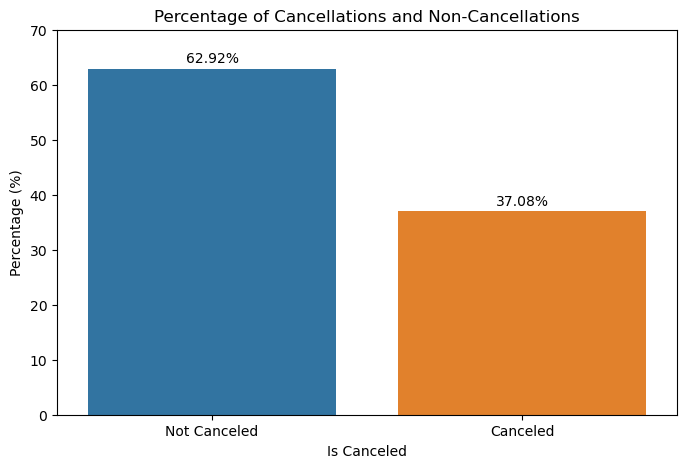

In [97]:
# Calculating the percentage of each class
percentage = booking_data['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage)
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

The above bar shoes that almost 63% of the bookings are not canceled and around 37% are canceled, this indicates that there are some imbalance in the target variable. But since the imbalance is only minor and the minority class(canceled) is still well represented, the minore imbalance is ignored. A dataset is generally considered highly imbalance if one of the class represents over 80% of the data.


In [98]:
# Define the features (X) and the output labels (y)
X = booking_data.drop('is_canceled', axis=1)
y = booking_data['is_canceled']

In [99]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95188, 53)
(23797, 53)
(95188,)
(23797,)


In [100]:
rf_classifier = RandomForestClassifier(random_state=0)

Initially, we started experimenting with multiple classification models, including Logistic Regression, Random Forest, and Support Vector Machine (SVM), to evaluate their performance on this classification task. Among these, the Random Forest model consistently achieved the highest accuracy of above 75% on the validation set, outperforming the others in terms of both f1-score and recall.So, based on these results, we selected Random forest as our final model.

### Random Forest hyperparameter tuning with RandomizedSearchCV

At first, we tried out several classification models, namely Logistic Regression, Random Forest, and Decision tree, to check which one worked the best for this classification task. It was the Random Forest model that every time got the highest accuracy of over 75% on the validation set and also took the lead in f1-score and recall.Therefore, we opted for Random forest as our final model relying on these results.

In [101]:
param_dist_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

Here, we applied a Stratified K-Fold cross-validation strategy, where the minority class (i.e., not canceled) and majority class (i.e., canceled) were guaranteed to have the same number of samples in each training and validation fold. This strategy is suitable given that our dataset is slightly imbalanced; thus, class proportions consistently maintained will lead to more dependable and fair model evaluations during training. By resorting to stratified splits, we prevent the model's performance from being skewed towards the larger class and, subsequently, the model is able to generalize better on unseen data.

In [102]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [103]:
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

The RandomizedSearchCV step is carried out by fitting it on the training data during this stage. The model conducts training on several configurations of Random Forest across the desired parameter space and employs cross-validation to ascertain which combination is yielding the highest performance according to F1-score criteria. Eventually, the superior model along with its parameters is kept for further evaluation. This way, the ultimate model is not merely well-trained but also optimized to attain the highest predictive accuracy that still retains generalizability.

In [104]:
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

print("Best CV score (F1):", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best CV score (F1): 0.7832267309572506
Best parameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 18, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 2}}


The moment the best Random Forest model is recognized, it will be the one to make predictions on the test dataset. The `predict()` method outputs binary values that show whether each booking is expected to be canceled or not, while the `predict_proba()` method provides the chances of cancellation for each booking. This process is very important to the model evaluation with classification metrics and also to the creation of visual aids like ROC and Precision-Recall curves that depend on predicted probabilities instead of binary outcomes.

In [105]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

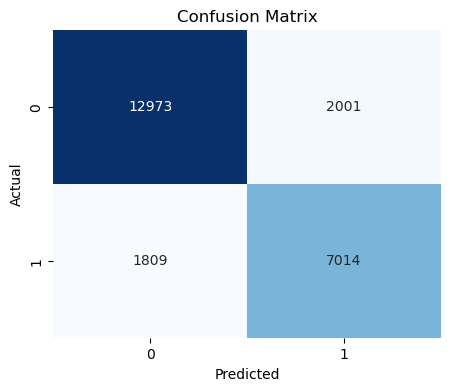

In [106]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


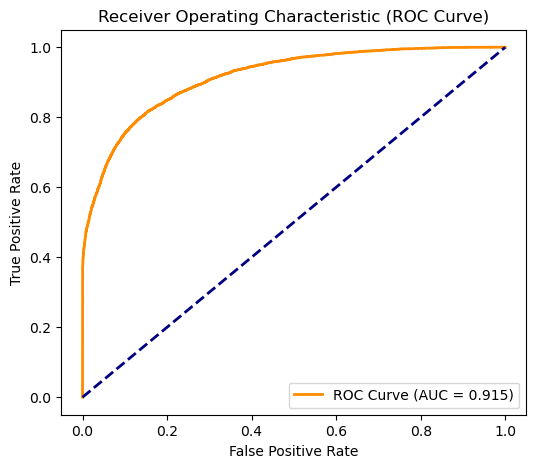

In [107]:
#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()

Now from the above roc curve, we can tell the canceled bookings from the non-canceled ones. The ROC curve reflects the connection between the True Positive Rate (the number of actual cancellations correctly identified) and the False Positive Rate (the number of non-cancellations wrongly identified as cancellations). The Area Under the Curve (AUC) score offers a singular numeric evaluation of this performance, the higher the AUC, the better the model is at telling the two classes apart. Here, an AUC around 0.91 signals that the model is very effective in detecting booking cancellations.

In [108]:
# Metrics
print("\nTest set performance:")
print("F1       :", f1_score(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification report:\n", classification_report(y_test, y_pred))


Test set performance:
F1       : 0.7864110326269761
Accuracy : 0.8398957851830062
Precision: 0.778036605657238
Recall   : 0.7949676980618837
ROC-AUC  : 0.914953916646423

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     14974
           1       0.78      0.79      0.79      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



Now, we evaluate the final performance of the trained model on the test dataset using metrics such as F1-score, accuracy, precision, recall, and ROC-AUC. The evaluated result shows that the model achieves an F1 score of around 0.79 for canceled bookings and with an overall accuracy of 84. Also the evaluation shows a high ROC_AUC of 0.91 which shows strong ability to diffrentiate between cancelled and not canceled.

## Model Extraction

After evaluation, the trained model is saved as a .pkl file using joblib, which will allow us to load the model for integration while making a Streamlit web application. This ensures the model can be reused without retraining.

In [109]:
save_path = Path("../models/booking_cancellation_model.pkl")

joblib.dump(best_model, save_path)

print(f"Model saved to: {save_path.resolve()}")

Model saved to: /Users/sirishkonda/Documents/Gisma University/MODULES/business projec/hotel_booking_cancellation_app/models/booking_cancellation_model.pkl
[CV] END class_weight={0: 1, 1: 1}, criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   8.3s
[CV] END class_weight={0: 1, 1: 3}, criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=150; total time=  13.0s
[CV] END class_weight={0: 1, 1: 1}, criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=  10.5s
[CV] END class_weight={0: 1, 1: 1}, criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=150; total time=  13.4s
[CV] END class_weight={0: 1, 1: 3}, criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  10.8s
[CV] END class_weight={0: 1, 1: 1}, criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, 